# Hackathon Example

Das Ziel des Hackathons ist, Energiedaten zu kombinieren und interessante Resultate zu visualisieren. Dazu verwenden wir am besten Jupyter Notebooks wie dieses hier.

In einem Notebook können wir Markdown-Code mit Python kombinieren, die einzelnen Code-Blöcke immer wieder anpassen, und die Resultate direkt modifizieren.

## Tools

### Python
Selbstredend.

### Jupyter Notebook Extension

Extension von Visual Studio Code. [Hier installieren](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).

### Bibliotheken
####  matplotlib (pyplot)
Eine Python-Bibliothek (also eine Sammlung von Funktionen), um mit Python schöne Grafiken zu erstellen.
#### Pandas
Data-Science Bibliothek
#### Folium
Geo-Visualisierungstools

Generell lassen sich gängige Bibliotheken vom Terminal mit `pip` installieren
```bash
python -m pip install matplotlib pandas folium
```
Wir können alternativ aber auch einfach sicherstellen, dass der _Kernel_, der den Python-Code dieses Notebooks ausführt, die Bibliotheke installiert hat:

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib pandas folium geopandas geopy plotly.express

## Comma-Separated Values

Wir wollen die öffentlich verfügbaren Datensätze verarbeiten. Die tabellarischen Daten liegen oft im CSV-Format (Comma-Separated Values) vor. Dabei repräsentiert jede Zeile ein Eintrag, wobei die Werte der einzelnen Spalten mit Kommas (manchmal auch Semikolons) abgetrennt sind. Enthält ein Wert ein Komma, kann der Wert in Anführungszeichen eingeschlossen sein. Die erste Zeile enthält oft die Spaltennamen:

```
Postleitzahl,Ort,Einwohner
8590,Romanshorn,11296
8580,Amriswil,14157
9320,Arbon,14872
```

Wir verwenden gleich die Pandas-Bibliothek, um CSV zu lesen.

Zum Beispiel möchten wir mit den Daten zur Energieproduktion der Thurgauer Gemeinden arbeiten. Das Dataset findet sich unter https://data.tg.ch/explore/dataset/div-energie-10/table/, den Link zum CSV-Download findet sich unter _Exporte_. Der Download verwendet Semikolons.

Die Spaltennamen entnehmen wir ebenfalls der Webseite, um die Gemeinde und deren Energieproduktion zu erhalten.

In [27]:
import pandas as pd

source = 'https://data.tg.ch/api/explore/v2.1/catalog/datasets/div-energie-10/exports/csv'

# CSV-Daten mit Pandas lesen.
# Achtung: wir verwenden Semikolons statt Kommas als Trennzeichen.
# header=0 teilt der Funktion mit, dass wir Spaltenheader in der Datei erwarten.
energy_dataset = pd.read_table(source, sep=';', header=0)
# Wie sehen die Daten aus?
energy_dataset

,jahr,bfs_nr_gemeinde,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
0,2020,4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260
1,2020,4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061
2,2020,4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210
3,2020,4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971
4,2020,4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2015,4871,Wagenhausen,1672,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.259
476,2015,4946,Weinfelden,11147,8.266,NaN,NaN,39.873,NaN,0.474,2.011,NaN,50.624
477,2015,4951,Wigoltingen,2369,NaN,NaN,0.398,NaN,NaN,NaN,1.254,NaN,1.652
478,2015,4791,Wuppenau,1120,NaN,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.720


Für den Anfang interessieren uns nur die Werte 2020. Zudem möchten wir nur die Gemeinde und die totale Energieproduktion.

Filtern können wir die Daten, indem wir ein Bool-Array übergeben, das die gleiche Länge hat wie das Dataset.

Spalten einschränken können wir, indem wir eine Liste der gewünschten Spaltennamen übergeben.

In [45]:
only2020 = energy_dataset[energy_dataset['jahr'] == 2020]
only2020[['bfs_nr_gemeinde', 'gemeinde_name', 'total']]

,bfs_nr_gemeinde,gemeinde_name,total
0,4881,Amlikon-Bissegg,8.260
1,4461,Amriswil,5.061
2,4891,Berg (TG),3.210
3,4901,Birwinken,0.971
4,4471,Bischofszell,6.251
...,...,...,...
75,4701,Wäldi,1.552
76,4946,Weinfelden,73.173
77,4951,Wigoltingen,3.122
78,4791,Wuppenau,1.271


## Aufgabe: Daten generieren

Erstelle ein Dataset ähnlich wie `only2020`, aber fügen zusätzlich eine Spalte `strom_pro_kopf` hinzu, die die Stromproduktion pro Einwohner berechnet.

## Daten zusammenfassen und Visualisieren

TBD

Stop here, please, the rest is just failed attempts (so far)...

In [112]:
import geopandas as gpd
municipalities = gpd.read_file("../data/towns.geojson")
data_to_plot = only2020[['bfs_nr_gemeinde', 'gemeinde_name', 'total']]

In [116]:
# Fix up municipalities by parsing the bfs_nr from the gml_id and converting it
# to int64.
municipalities = municipalities[['gml_id', 'nationalCode', 'LocalisedCharacterString', 'text', 'geometry']]
bfs_nrs = municipalities['gml_id'].str.extract(r"(\d+)")
municipalities['bfs_nr_gemeinde'] = pd.to_numeric(bfs_nrs[0])
municipalities = municipalities.dropna(subset='bfs_nr_gemeinde')

municipalities['bfs_nr_gemeinde'].astype('int64')
municipalities.dtypes


gml_id                        object
nationalCode                  object
LocalisedCharacterString      object
text                          object
geometry                    geometry
bfs_nr_gemeinde                int64
dtype: object

In [117]:
# Inner Join of municipalities geo data with energy data
# Inner Join means: we only keep rows that have the same number in bfs_nr_gemeinde
# meaning: we remove any row in the huge dataset that is not in the set of Thurgau towns.
import pandas as pd
joined = pd.merge(municipalities, data_to_plot, how="inner", on="bfs_nr_gemeinde")
joined.head()

,gml_id,nationalCode,LocalisedCharacterString,text,geometry,bfs_nr_gemeinde,gemeinde_name,total
0,AdministrativeUnit_Gemeinde_4651,CH,Gemeinde,Gottlieben,"MULTIPOLYGON (((1015394.782 6051105.977, 10153...",4651,Gottlieben,0.035
1,AdministrativeUnit_Gemeinde_4851,CH,Gemeinde,Salenstein,"MULTIPOLYGON (((1009842.472 6047985.189, 10097...",4851,Salenstein,0.538
2,AdministrativeUnit_Gemeinde_4741,CH,Gemeinde,Lommis,"MULTIPOLYGON (((1003037.893 6024982.034, 10030...",4741,Lommis,0.533
3,AdministrativeUnit_Gemeinde_4696,CH,Gemeinde,Tägerwilen,"MULTIPOLYGON (((1015394.782 6051105.977, 10155...",4696,Tägerwilen,4.426
4,AdministrativeUnit_Gemeinde_4506,CH,Gemeinde,Sulgen,"MULTIPOLYGON (((1021087.392 6029203.396, 10211...",4506,Sulgen,1.895


In [120]:
import folium
map = folium.Map(location=[100, 0], zoom_start=1.5)
chloropleth = folium.Choropleth(geo_data=joined,data_to_plot=joined,
             columns=['bfs_nr_gemeinde', 'total'],
             key_on='bfs_nr_gemeinde',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name="Foo")
chloropleth.add_to(map)

# Create Folium plot
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import IFrame

IFrame('plot_data.html', width=700, height=450)


In [ ]:
import geopandas, geopandas.tools.geocoding

only2020.gemeinde_name
gemeinde_locations = geopandas.tools.geocode(only2020.gemeinde_name)

In [43]:
gemeinde_locations.head()

,geometry,address
0,POINT (9.04021 47.56192),"Amlikon-Bissegg, 8514, Thurgau, Schweiz/Suisse..."
1,POINT (9.29812 47.55002),"Amriswil, Thurgau, Schweiz/Suisse/Svizzera/Svizra"
2,POINT (9.17308 47.57713),"Berg TG, Thurgau, Schweiz/Suisse/Svizzera/Svizra"
3,POINT (9.19768 47.58211),"Birwinken, Thurgau, Schweiz/Suisse/Svizzera/Sv..."
4,POINT (9.24092 47.49377),"Bischofszell, Thurgau, Schweiz/Suisse/Svizzera..."


<AxesSubplot:>

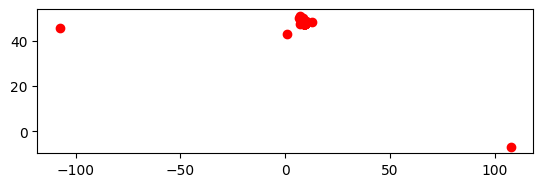

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gemeinde_locations.plot(ax=ax, color="red")